# Topic 25-Pt 1: Intro to Logistic Regression 

- onl01-dtsc-ft-022221
- 05/06/21

## Questions?

- 

## Announcements

- **Sect 25 will be split into 2 study groups.**
- Sect 26 doesn't introduce much/anything new
    - It revisits gradient descent and applies it to Logistic Regression.
    - **We will discuss** some of the concepts re-introduced next study group.
    - **We will NOT have an entire study group** dedicated to section 26


- **You will want/need to update matplotlib and scikit-learn** ( See IMPORTANT NOTE ABOUT PACKAGE VERSIONS)
   

## Topics in Sect 25

- For Today:
    - Supervised vs Unsupervised Learning
    - Logistic Regression - Theory
    - Applying Logistic Regression with `statsmodels`
    - Evaluating Classifiers
        - Confusion Matrices
        - Accuracy, Precision, Recall, F1-Score

            - If there's time today (otherwise covered in part 2 tomorrow):
             

- For Next Class:
    - Logistic Regression with `scikit-learn`
    - Evaluating Classifiers:
        - ROC-AUC curve
    - Class Imbalance Problems

# Types of Machine Learning Models

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/ai_machine_learning_deep_learning.png">

## Intro to Supervised Learning

> "The term **_Supervised Learning_** refers to a class of machine learning algorithms that can "learn" a task through **_labeled training data_**."

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-intro-to-supervised-learning-v2-1-online-ds-pt-100719/master/images/new_ml-hierarchy.png" width=60%>

- All machine learning models fall into one of two categories:
    - Regressors/Regression
    - Classifiers/Classification

### Regression

Trying to find the **relationship** and predict a specific value.

- Examples of regressions:
    - House prices
    - Salary
    - Reviews/Ratings

### Classification

Trying to identify what features can predict which class a particular observation/row belongs to.
- Can be a "binary classification" 
    - "yes" or "no"
    - Survived or died.
    - Diabetic or not-diabetic
- Can also be a "multiclass classification"
    - Which type of flower?
    - Will a football game end one team winning, or the other team, or a tie?


# From Linear Regression to Logistic Regression


<img src="https://raw.githubusercontent.com/jirvingphd/online-dtsc-pt-041320-cohort-notes/master/assets/images/logistic_vs_linear.jpg">

## Recall Linear Regression

### Formula

$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = \sum_{i=0}^{N} \beta_i x_i $$

- Output is specifying the **predicted value** for the target

## Classification: Use Logistic Regression

- Output is specifying the **probability** of belonging to a particular group

- Visual Example:
    - https://www.desmos.com/calculator/y2ilpxiqys

Transform from linear regression!

$$ \large \hat y = \sum_{i=0}^{N} \beta_i x_i $$

$$\large P = \displaystyle \frac{1}{1+e^{-\hat y}} = \frac{1}{1+e^{-\sum_{i=0}^{N} \beta_i x_i}} $$

$$ \large = \frac{1}{1+e^{-\beta_0}e^{-\beta_1 x_1}\ldots e^{-\beta_N x_N}} $$

# Implementing Logistic Regression

## Predict Passenger Survival on the Titanic with `scikit-learn`

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 


# import statsmodels.api as sm

In [2]:
url = "https://raw.githubusercontent.com/jirvingphd/dsc-dealing-missing-data-lab-online-ds-ft-100719/master/titanic.csv"
df = pd.read_csv(url,index_col=0,na_values='?')
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex', 'Embarked', 'Survived']
df = df[relevant_columns]
df.head()

,Pclass,Age,SibSp,Fare,Sex,Embarked,Survived
0,3.0,22.0,1,7.2500,male,S,0
1,1.0,38.0,1,71.2833,female,C,1
2,3.0,26.0,0,7.9250,female,S,1
3,1.0,35.0,1,53.1000,female,S,1
4,3.0,35.0,0,8.0500,male,S,0


In [3]:
df['Survived'].value_counts(normalize=True,dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Text(0.5, 0.98, 'X Features vs Survived')

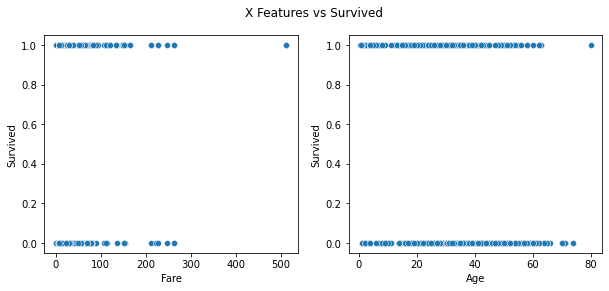

In [4]:
fig,ax= plt.subplots(ncols=2,figsize=(10,4))
sns.scatterplot(data=df, x='Fare',y='Survived',ax=ax[0])
sns.scatterplot(data=df, x='Age',y='Survived',ax=ax[1])
fig.suptitle('X Features vs Survived')

Text(0.5, 0.98, 'X Features vs Survived - Regression')

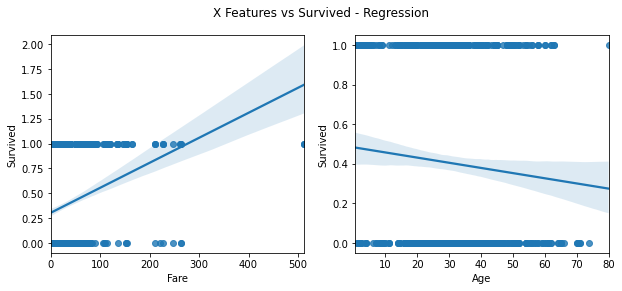

In [5]:
fig,ax= plt.subplots(ncols=2,figsize=(10,4))
sns.regplot(data=df, x='Fare',y='Survived',ax=ax[0])
sns.regplot(data=df, x='Age',y='Survived',ax=ax[1])
fig.suptitle('X Features vs Survived - Regression')

### Q: What are the preprocessing steps I need to perform before I create the model?

- Recast data types
- Train-test-split
- Fill/drop in missing/null values
- Feature Selection / Feature Engineering (interaction terms)
- Handling categorial variables
    - One Hot Encoding 
    - Label Encoding
- Handling Outliers (maybe)
- Normalizing/Standardizing our data

- **Multicollinearity (does it still matter as much for Logistic?)**



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    842 non-null    float64
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Sex       891 non-null    object 
 5   Embarked  889 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 55.7+ KB


In [7]:
## Check Object cols 
display(df['Embarked'].value_counts(dropna=False),
        df['Sex'].value_counts(dropna=False))

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

### Preprocessing

In [8]:
## train test split
target = 'Survived'

y = df[target]
X = df.drop(target, axis=1)

# Perform test train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,)
#                                                      random_state=12)
[var.shape for var in [X_train , X_test, y_train, y_test]]

[(623, 6), (268, 6), (623,), (268,)]

In [9]:
## Check for nulls in training set
X_train.isna().sum()

Pclass       30
Age         119
SibSp         0
Fare          0
Sex           0
Embarked      2
dtype: int64

In [10]:
## Specify which values to impute with which method

## Most frequent
mode_cols = ['Pclass','Embarked']
## Fill with median
median_cols = ['Age']

In [11]:
## Copying X_train and X_test as start of X_train_tf,X_test_tf
X_train_tf = X_train.copy()
X_test_tf = X_test.copy()

In [12]:
## Impute the columns with most-frequent value
imputer_mode = SimpleImputer(strategy='most_frequent')

X_train_tf[mode_cols] = imputer_mode.fit_transform(X_train_tf[mode_cols].copy())
X_test_tf[mode_cols] = imputer_mode.transform(X_test_tf[mode_cols].copy())

## Verify it worked
X_train_tf.isna().sum()

Pclass        0
Age         119
SibSp         0
Fare          0
Sex           0
Embarked      0
dtype: int64

In [13]:
## Impute cols with 0s
imputer_median = SimpleImputer(strategy='median')

X_train_tf[median_cols] = imputer_median.fit_transform(X_train_tf[median_cols])
X_test_tf[median_cols] = imputer_median.transform(X_test_tf[median_cols])

## Verify it worked
print(X_train_tf.isna().sum())
X_test_tf.isna().sum()

Pclass      0
Age         0
SibSp       0
Fare        0
Sex         0
Embarked    0
dtype: int64


Pclass      0
Age         0
SibSp       0
Fare        0
Sex         0
Embarked    0
dtype: int64

In [14]:
## Specifing which cols to encode and which to scale. 
cat_cols = df.select_dtypes('O').columns
num_cols = df.drop(columns=[target,*cat_cols]).columns
cat_cols,num_cols

(Index(['Sex', 'Embarked'], dtype='object'),
 Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object'))

In [15]:
## Encode cat_cols
encoder = OneHotEncoder(sparse=False,  drop='first')
encoder.fit(X_train_tf[cat_cols])

train_cat_cols = pd.DataFrame(encoder.transform(X_train_tf[cat_cols]),
                              columns=encoder.get_feature_names(cat_cols),
                              index=X_train_tf.index)

test_cat_cols = pd.DataFrame(encoder.transform(X_test_tf[cat_cols]),
                              columns=encoder.get_feature_names(cat_cols),
                              index=X_test_tf.index)

train_cat_cols

,Sex_male,Embarked_Q,Embarked_S
55,1.0,0.0,1.0
251,0.0,0.0,1.0
6,1.0,0.0,1.0
513,0.0,0.0,0.0
664,1.0,0.0,1.0
...,...,...,...
833,1.0,0.0,1.0
651,0.0,0.0,1.0
181,1.0,0.0,0.0
39,0.0,0.0,0.0


In [16]:
## Scaling Num_cols
scaler = StandardScaler()

train_num_cols = pd.DataFrame(scaler.fit_transform(X_train_tf[num_cols]),
                              columns=num_cols,index=X_train_tf.index)

test_num_cols = pd.DataFrame(scaler.transform(X_test_tf[num_cols]),
                             columns=num_cols, index=X_test_tf.index)
train_num_cols

,Pclass,Age,SibSp,Fare
55,-1.664685,-0.084234,-0.471070,0.105589
251,0.792895,-0.007108,0.460602,-0.432216
6,-1.664685,1.921023,-0.471070,0.457056
513,-1.664685,1.921023,0.460602,0.618962
664,0.792895,-0.701236,0.460602,-0.486722
...,...,...,...,...
833,0.792895,-0.469860,-0.471070,-0.488243
651,-0.435895,-0.855486,-0.471070,-0.162911
181,-0.435895,-0.084234,-0.471070,-0.333677
39,0.792895,-1.163987,0.460602,-0.415479


In [17]:
## Combine Num and Cat Cols

X_train_tf = pd.concat([train_num_cols,train_cat_cols],axis=1)
X_test_tf = pd.concat([test_num_cols,test_cat_cols],axis=1)

X_train_tf

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
55,-1.664685,-0.084234,-0.471070,0.105589,1.0,0.0,1.0
251,0.792895,-0.007108,0.460602,-0.432216,0.0,0.0,1.0
6,-1.664685,1.921023,-0.471070,0.457056,1.0,0.0,1.0
513,-1.664685,1.921023,0.460602,0.618962,0.0,0.0,0.0
664,0.792895,-0.701236,0.460602,-0.486722,1.0,0.0,1.0
...,...,...,...,...,...,...,...
833,0.792895,-0.469860,-0.471070,-0.488243,1.0,0.0,1.0
651,-0.435895,-0.855486,-0.471070,-0.162911,0.0,0.0,1.0
181,-0.435895,-0.084234,-0.471070,-0.333677,1.0,0.0,0.0
39,0.792895,-1.163987,0.460602,-0.415479,0.0,0.0,0.0


In [18]:
X_train_tf.describe().round(2)

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
count,623.00,623.00,623.00,623.00,623.00,623.00,623.00
mean,-0.00,0.00,-0.00,-0.00,0.66,0.07,0.74
std,1.00,1.00,1.00,1.00,0.47,0.25,0.44
min,-1.66,-2.21,-0.47,-0.66,0.00,0.00,0.00
25%,-0.44,-0.55,-0.47,-0.49,0.00,0.00,0.00
50%,0.79,-0.08,-0.47,-0.35,1.00,0.00,1.00
75%,0.79,0.46,0.46,-0.01,1.00,0.00,1.00
max,0.79,3.46,6.98,10.35,1.00,1.00,1.00


## Fitting a Logistic Regression with `scikit-learn`

In [19]:
## Fit a logistic regression model with defaults
log_reg = LogisticRegression()
log_reg.fit(X_train_tf, y_train)

LogisticRegression()

> ### But how do we know how GOOD it is?

In [20]:
log_reg.score(X_train_tf,y_train)

0.7768860353130016

In [21]:
## Get the model's .score
print(f"Training Score:\t{log_reg.score(X_train_tf,y_train):.2f}")
print(f"Test Score:\t{log_reg.score(X_test_tf,y_test):.2f}")

Training Score:	0.78
Test Score:	0.82


> But what "score" is this?

In [22]:
## Get Predictions for training and test data
y_hat_train = log_reg.predict(X_train_tf)
y_hat_test = log_reg.predict(X_test_tf)

In [23]:
## is it r-squared?
metrics.r2_score(y_test,y_hat_test)

0.26725905673274075

> Hmmm...its not $R^{2}$

In [24]:
## Try root_mean_square_error
metrics.mean_squared_error(y_test,y_hat_test,squared=False)

0.42320736951515897

> Hmmm...its not $\text{RMSE}$

In [25]:
## Try accuracy_score
metrics.accuracy_score(y_test,y_hat_test)

0.8208955223880597

> Ah-ha! The default `.score` for a classification model is **accuracy**. 

In [26]:
### Getting our model's coefficients
## Our function from last class
def get_coefficients(model,X_train):
    coeffs = pd.Series(model.coef_.flatten(), index=X_train.columns)
    coeffs['intercept'] = model.intercept_[0]
    return coeffs

In [27]:
coeffs = get_coefficients(log_reg,X_train_tf)
coeffs

Pclass       -0.625722
Age          -0.448252
SibSp        -0.340764
Fare          0.325072
Sex_male     -2.321165
Embarked_Q   -0.371528
Embarked_S   -0.218707
intercept     1.038566
dtype: float64

In [28]:
(X_test_tf.iloc[0] * coeffs ).sum() + coeffs['intercept'] 

0.21029878492160914

### Understanding Our Model's Mistakes

- For classification tasks, it can be extremely helpful to examine a "Confusion Matrix" to understand how our model is wrong. 

In [29]:
## Use metrics.confusion_matrix
cm = metrics.confusion_matrix(y_test,y_hat_test)
cm

array([[138,  16],
       [ 32,  82]])

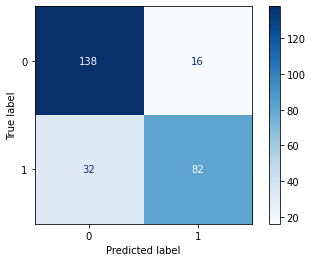

In [30]:
## Use metrics.plot_confusion_matrix
metrics.plot_confusion_matrix(log_reg,X_test_tf,y_test,cmap='Blues')

>- The Confusion Matrix separated out the correct (true) predictions for the positive class (1) and negative class (0). 

- **_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

- **_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

- **_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

- **_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).


In [31]:
cm = metrics.confusion_matrix(y_test,y_hat_test)
cm

array([[138,  16],
       [ 32,  82]])

```
[TN,FP],
[FN,TP]
```

In [32]:
## SLice out TN/FP/etc from cm
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [33]:
## Make sure we got the order right
print(TN,FP)
print(FN,TP)

138 16
32 82


### Classification Metrics are based on the confusion matrices of our model

#### Accuracy

$$ \large \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

> "Out of all the predictions our model made, what percentage were correct?"
- "Accuracy is the most common metric for classification. It provides a solid holistic view of the overall performance of our 
model."

#### When to use?
- **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)


In [34]:
## calcualte accuracy manually
acc = (TP+TN)/(TP+TN+FP+FN)
acc

0.8208955223880597

In [35]:
## compare against the accuracy_score
metrics.accuracy_score(y_test,y_hat_test)

0.8208955223880597

### Normalized Confusion Matrices

In [36]:
## Try using normalize=true for confusion matrix
metrics.confusion_matrix(y_test,y_hat_test,normalize='true')

array([[0.8961039 , 0.1038961 ],
       [0.28070175, 0.71929825]])

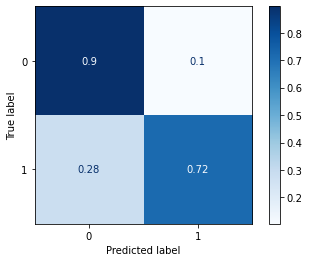

In [37]:
## Try using normalize=true for plot confusion matrix
metrics.plot_confusion_matrix(log_reg,X_test_tf,y_test,normalize='true',cmap='Blues')

### How do I know if my accuracy score is good?

> Does your model predict better than chance/just getting the class distribution?
- Compare your accuracy to your normalized value counts for y
- Compare your model against a `DummyClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

In [38]:
y_train.value_counts(normalize=True)

0    0.634029
1    0.365971
Name: Survived, dtype: float64

In [39]:
y_test.value_counts(normalize=True)

0    0.574627
1    0.425373
Name: Survived, dtype: float64

In [40]:
from sklearn.dummy import DummyClassifier
model =DummyClassifier(strategy="stratified")
model.fit(X_train_tf,y_train)

DummyClassifier(strategy='stratified')

In [41]:
## Get the model's .score
print(f"Training Score:\t{model.score(X_train_tf,y_train):.2f}")
print(f"Test Score:\t{model.score(X_test_tf,y_test):.2f}")

Training Score:	0.54
Test Score:	0.53


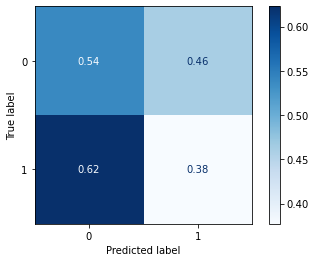

In [42]:
## Check the confusion matrix
metrics.plot_confusion_matrix(model,X_test_tf,y_test,cmap='Blues',
                             normalize='true')

> But accuracy isn't the best metric when you have imbalanced classes. 
- Next class we will introduce more classification metrics

# Intro to Part 2: Classification Metrics / Evaluating Classifiers 

> [The 5 Classification Evaluation metrics every Data Scientist must know](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)

## Evaluation Metrics

### Accuracy

$$ \large \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

> "Out of all the predictions our model made, what percentage were correct?"
- "Accuracy is the most common metric for classification. It provides a solid holistic view of the overall performance of our 
model."

#### When to use?
- **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)


In [43]:
metrics.accuracy_score(y_test, y_hat_test)

0.8208955223880597

### Precision

> "**_Precision_** measures what proportion of predicted Positives is truly Positive?


$$ \large \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$


#### When to use?
- **Use precision** when the cost of acting is high and acting on a positive is costly.
   - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

In [44]:
metrics.precision_score(y_test, y_hat_test)

0.8367346938775511

### Recall

> **_Recall_** indicates what percentage of the classes we're interested in were actually captured by the model."
$$ \large \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$ 


#### When to use?
- **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
    - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)

In [45]:
metrics.recall_score(y_test, y_hat_test)

0.7192982456140351

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/precisionrecall.png' width=10%>

### $F_1$ Score

F1 score represents the **_Harmonic Mean of Precision and Recall_**.  In short, this means that the F1 score cannot be high without both precision and recall also being high. When a model's F1 score is high, you know that your model is doing well all around. 

> Harmonic Mean: "the reciprocal of the arithmetic mean of the reciprocals of a given set of observatins." - *[Wikipedia](https://en.wikipedia.org/wiki/Harmonic_mean)*

#### Arithmetic Mean:

$$\large \bar{X} = \frac{a+b+c}{n} $$

#### Harmonic Mean:

$$ \large \bar{X} = \frac{n}{\frac{1}{a}+ \frac{1}{b}+ \frac{1}{c}}$$


**The formula for F1 score is:**

> $$ \text{F1 score} =  \frac{2}{\text{Precision}^{-1}\ x\ \text{Recall}^{-1}}= 2\ \frac{\text{Precision}\ x\ \text{Recall}}{\text{Precision} + \text{Recall}} $$

#### When to use?
- **F1 score** is really the most informative about overall model quality.
- BUT is the most difficult to express to a non-tech audience

## Which metric to use?

- **When in doubt, use them all!** 
 -`metrics.classification_report`
 

In [46]:
print(metrics.classification_report(y_test,y_hat_test,target_names=['Died','Survived']))

              precision    recall  f1-score   support

        Died       0.81      0.90      0.85       154
    Survived       0.84      0.72      0.77       114

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [47]:
metrics.recall_score(y_test, y_hat_test).round(2)

0.72

- **But some good rules of thumb:**
    - **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)
    
    - **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
        - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)
    - **Use precision** when the cost of acting is high and acting on a positive is costly.
       - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

- **F1 score** is really the most informative about overall model quality, but is the most difficult to express to a non-tech audience

# APPENDIX 

## IMPORTANT NOTE ABOUT PACKAGE VERSIONS

### scikit-learn & matplotlib

In [48]:
#### scikit-learn version
## Run COnda List to Verify what versions are installed and how
# %conda list scikit-learn

- You will need sklearn to be version 0.23 + to have all of the tools covered in lessons.
    > Note: sklearn is listed as `scikit-learn`<br>to update: 
    `conda update scikit-learn`
 

In [49]:
## If have less than 0.23, run this command
# %conda update scikit-learn

In [50]:
#### matplotlib version
# %conda list matplotlib

- You will want to update matplotlib to fix errors with your confusion matrix plots
    > `pip install -U matplotlib`

In [51]:
# !pip install -U matplotlib